### Importing libraries

In [710]:
import pandas as pd
import numpy as np 
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import json
import tweepy
from tweepy import OAuthHandler
import os
import time
import datetime
from timeit import default_timer as timer
import seaborn as sns


### GATHERING DATA

# 1. Twitter Archive File 

In [711]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

## 2. Image Prediction File

In [712]:
#By Downloading programatically through udacity hosted servers
url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open ('image_predictions.tsv', mode = 'wb') as f:
    f.write(response.content)
    
#
image_Prediction = pd.read_csv('image_predictions.tsv', sep='\t')


# 3. Twitter Json Data

In [713]:
json=pd.read_json('tweet-json.txt',lines=True)

In [714]:
json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [715]:
tweet_json = pd.DataFrame(json, columns=['id','favorite_count','retweet_count'])
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


**Visual Assessmet**

In [716]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [717]:
image_Prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [718]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


**Programmatic Assesment**

In [719]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [720]:
image_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [721]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [722]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [723]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [724]:

twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [725]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [726]:
image_Prediction.p1_dog.value_counts()


True     1532
False     543
Name: p1_dog, dtype: int64

In [727]:
image_Prediction.p2_dog.value_counts()


True     1553
False     522
Name: p2_dog, dtype: int64

In [728]:
image_Prediction.p3_dog.value_counts()


True     1499
False     576
Name: p3_dog, dtype: int64

# Quality issues

## twitter_archive' table
##### Keep original ratings (no retweets) that have images
###### I can see missing values in (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp )
#### Timestamp should be datetime datatype not a object datatype.
#### The null values inside the doggo , floofer , pupper , puppo  columns are seen as None but we can change it to value(Null).

## image_pred' table
#### Nondescriptive column headers p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog .
#### The columns p1,p2 and p3 are various breeds of dogs and hence must be categorical instead of object type.
#### The columns p1_dog, p2_dog and p3_dog must be of type bool.
#### create  1 column for image prediction and 1 column for confidence level

## tweet_json table
#### For the tweet jason table there are no null values and datatypes are clear

## Tidiness
#### All three data tables should be in one dataframe.
#### We can merge doggo , floofer , pupper , puppo columns  in to one column





# cleaning 

In [729]:
# Define(making a clean data frame by copying original one)
#code
twitter_archive_clean = twitter_archive.copy()
#test
twitter_archive_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [730]:
#define (Delete retweets by filtering the NaN of retweeted_status_user_id)

#CODE
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [731]:
#Define(drop unwanted columns)
#code
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id' , 'retweeted_status_timestamp'], axis=1)
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [732]:
#Define (Create a new column with rating in float type to avoid converting all int column to float)

#code
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)
#test
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12.0


In [733]:
# Define(replacing the "none" in doggo and floofer and pupper and puppo columns with null)
#code
twitter_archive_clean["doggo"] = twitter_archive_clean["doggo"].replace("None", "")
twitter_archive_clean["floofer"] = twitter_archive_clean["floofer"].replace("None", "")
twitter_archive_clean["pupper"] = twitter_archive_clean["pupper"].replace("None", "")
twitter_archive_clean["puppo"] = twitter_archive_clean["puppo"].replace("None", "")
#test
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
2034,671743150407421952,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,https://twitter.com/dog_rates/status/671743150...,11,10,a,,,,,11.0
468,817056546584727552,2017-01-05 17:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chloe. She fell asleep at the wheel. A...,https://twitter.com/dog_rates/status/817056546...,11,10,Chloe,,,,,11.0
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,,,,,420.0
1845,675845657354215424,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,,,pupper,,10.0
1054,742423170473463808,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,,,,,12.0


In [734]:
# Define(By merging  doggo and floofer and pupper and puppo columns to one column)
#code
twitter_archive_clean["dog_stage"] = twitter_archive_clean["doggo"] + twitter_archive_clean["floofer"] + twitter_archive_clean["pupper"] + twitter_archive_clean["puppo"]
#test
twitter_archive_clean["dog_stage"].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [735]:
# Define (replace  the space with null)
#code
twitter_archive_clean["dog_stage"] = twitter_archive_clean["dog_stage"].replace('',np.nan)
#test
twitter_archive_clean["dog_stage"].value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [736]:
# Define (i see a non type in dog_stage columns, so i replacing them to understanding them)
 #code
twitter_archive_clean.loc[twitter_archive_clean["dog_stage"] == "doggofloofer", "dog_stage"] = "dpggp, floofer"
twitter_archive_clean.loc[twitter_archive_clean["dog_stage"] == "doggopupper", "dog_stage"] = "doggo, puppo"
twitter_archive_clean.loc[twitter_archive_clean["dog_stage"] == "doggopuppo", "dog_stage"] = "dpggp, puppo"
#test
twitter_archive_clean["dog_stage"].value_counts()

pupper            224
doggo              75
puppo              24
doggo, puppo       10
floofer             9
dpggp, floofer      1
dpggp, puppo        1
Name: dog_stage, dtype: int64

In [737]:
# Define (after done with merging i drop unwanted coulumns)
#code
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer', 'pupper' , 'puppo'],axis=1)
#test
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12.0,NaN


In [738]:
# Define (renaming non-descriptive column headers)
#making a clean data frame by copying original one
image_Prediction_clean= image_Prediction.copy()
#code
image_Prediction_clean = image_Prediction_clean.rename(columns =
                            {'p1': 'Possible_breed_1',
                            'p2': 'Possible_breed_2',
                            'p3': 'Possible_breed_3',
                            'p1_conf': 'Breed_1_confidence',
                            'p2_conf': 'Breed_2_confidence',
                            'p3_conf': 'Breed_3_confidence',
                            'p1_dog': 'Breed_1_present',
                            'p2_dog': 'Breed_2_present',
                            'p3_dog': 'Breed_3_present'})
#test
image_Prediction_clean

,tweet_id,jpg_url,img_num,Possible_breed_1,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [739]:
# Define(Convert Possible_breed_1,Possible_breed_2,Possible_breed_3 to category type)
#code
image_Prediction_clean.Possible_breed_1 = image_Prediction_clean.Possible_breed_1.astype('category')
image_Prediction_clean.Possible_breed_2 = image_Prediction_clean.Possible_breed_2.astype('category')
image_Prediction_clean.Possible_breed_3 = image_Prediction_clean.Possible_breed_3.astype('category')

# Define (Convert Breed_1_present, Breed_2_present, Breed_3_present to the type bool)
#code
image_Prediction_clean.Breed_1_present = image_Prediction_clean.Breed_1_present.astype('bool')
image_Prediction_clean.Breed_2_present = image_Prediction_clean.Breed_2_present.astype('bool')
image_Prediction_clean.Breed_3_present = image_Prediction_clean.Breed_3_present.astype('bool')
#test
image_Prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null int64
Possible_breed_1      2075 non-null category
Breed_1_confidence    2075 non-null float64
Breed_1_present       2075 non-null bool
Possible_breed_2      2075 non-null category
Breed_2_confidence    2075 non-null float64
Breed_2_present       2075 non-null bool
Possible_breed_3      2075 non-null category
Breed_3_confidence    2075 non-null float64
Breed_3_present       2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


In [740]:
#  Define(By creating  1 column for image prediction and 1 column for confidence level
#Create a function where I keep the first true prediction along the confidence level as new columns.)
dog_type = []
confidence_list = []

#code
#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_Prediction_clean):
    if image_Prediction_clean['Breed_1_present'] == True:
        dog_type.append(image_Prediction_clean['Possible_breed_1'])
        confidence_list.append(image_Prediction_clean['Breed_1_confidence'])
    elif image_Prediction_clean['Breed_2_present'] == True:
        dog_type.append(image_Prediction_clean['Possible_breed_2'])
        confidence_list.append(image_Prediction_clean['Breed_2_confidence'])
    elif image_Prediction_clean['Breed_3_present'] == True:
        dog_type.append(image_Prediction_clean['Possible_breed_3'])
        confidence_list.append(image_Prediction_clean['Breed_3_confidence'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_Prediction_clean.apply(image, axis=1)

#create new columns
image_Prediction_clean['dog_type'] = dog_type
image_Prediction_clean['confidence_list'] = confidence_list

#test
image_Prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,Possible_breed_1,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,dog_type,confidence_list
658,682389078323662849,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,1,curly-coated_retriever,0.482288,True,flat-coated_retriever,0.315286,True,Great_Dane,0.062179,True,curly-coated_retriever,0.482288
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,papillon,0.009736,True,Pembroke,0.954089
1959,865718153858494464,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,golden_retriever,0.673664,True,kuvasz,0.157523,True,Labrador_retriever,0.126073,True,golden_retriever,0.673664
1263,749036806121881602,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,1,sulphur-crested_cockatoo,0.960276,False,West_Highland_white_terrier,0.019522,True,Samoyed,0.006396,True,West_Highland_white_terrier,0.0195223
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True,malinois,0.640185


In [741]:
# Define(dogtype with error values are dropped) because from the above sample data we see dog_type has error values
#code
image_Prediction_clean = image_Prediction_clean[image_Prediction_clean['dog_type'] != 'Error']
#test
image_Prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,Possible_breed_1,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,dog_type,confidence_list
354,672591762242805761,https://pbs.twimg.com/media/CVWGotpXAAMRfGq.jpg,1,kuvasz,0.777659,True,Great_Pyrenees,0.112517,True,golden_retriever,0.038351,True,kuvasz,0.777659
1062,715220193576927233,https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg,1,Chihuahua,0.584026,True,Italian_greyhound,0.377077,True,Boston_bull,0.017400,True,Chihuahua,0.584026
1263,749036806121881602,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,1,sulphur-crested_cockatoo,0.960276,False,West_Highland_white_terrier,0.019522,True,Samoyed,0.006396,True,West_Highland_white_terrier,0.0195223
704,684926975086034944,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,1,Labrador_retriever,0.769412,True,golden_retriever,0.144893,True,lion,0.021440,False,Labrador_retriever,0.769412
1026,710833117892898816,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,Pembroke,0.803742,True,Cardigan,0.189712,True,German_shepherd,0.001746,True,Pembroke,0.803742


In [742]:
# Define(merge the data.)
#code
merging = twitter_archive_clean.merge(tweet_json, right_on = "id", left_on = "tweet_id")
#test
merging.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13.0,NaN,892420643555336193,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13.0,NaN,892177421306343426,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12.0,NaN,891815181378084864,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13.0,NaN,891689557279858688,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12.0,NaN,891327558926688256,41048,9774


In [743]:
# Define(combine all the data together)
#code
combined_data = merging.merge(image_Prediction_clean, right_on = "tweet_id", left_on = "tweet_id")
#test
combined_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,dog_type,confidence_list
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13.0,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12.0,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13.0,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12.0,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,13.0,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595


In [744]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 26 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null object
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
rating                1686 non-null float64
dog_stage             260 non-null object
id                    1686 non-null int64
favorite_count        1686 non-null int64
retweet_count         1686 non-null int64
jpg_url               1686 non-null object
img_num               1686 non-null int64
Possible_breed_1      1686 non-null category
Breed_1_confidence    1686 non-null float64
Breed_1_present       1686 non-null bool
Possible_breed_2      1686 non-null category
Breed_2_confidence    1686 non-null float64
Breed_2_present       1686 non-null 

In [745]:
#define(storing combined data and cleaned data to a new csv file)
#code
combined_data.to_csv('twitter_archive_master.csv',index = False , encoding = 'utf-8')


In [746]:
combined_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,dog_type,confidence_list
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13.0,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12.0,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13.0,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12.0,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,13.0,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595


# Analysis and Visualization

In [747]:
combined_data['dog_type'].value_counts()
# golden_retriever is the most common dog seen in the data set 

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Staffordshire_bullterrier          21
German_shepherd                    21
Cardigan                           21
Shih-Tzu                           20
beagle                             20
Siberian_husky                     20
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
kuvasz                             18
Lakeland_terrier                   18
basset      

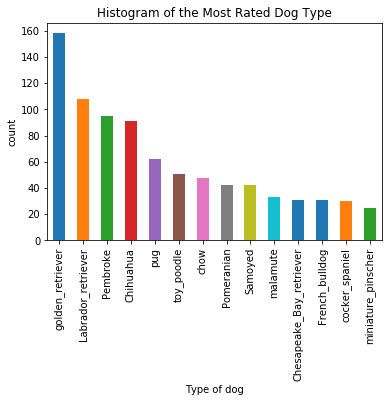

In [748]:
Top_dog_type = combined_data.groupby('dog_type').filter(lambda x: len(x) >= 25)

Top_dog_type['dog_type'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Type of dog')
plt.ylabel('count')

fig = plt.gcf() 


In [749]:

dog_type_mean = combined_data.groupby('dog_type').mean()


In [704]:
dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,rating,id,favorite_count,retweet_count,img_num,Breed_1_confidence,Breed_1_present,Breed_2_confidence,Breed_2_present,Breed_3_confidence,Breed_3_present
dog_type,,,,,,,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,9.666667,8.041621e+17,17326.666667,5976.0000,1.000000,0.433959,1.0000,0.099034,1.000000,0.081651,0.666667
Airedale,7.184489e+17,9.833333,10.0,9.833333,7.184489e+17,5280.833333,1393.7500,1.166667,0.583771,1.0000,0.129887,0.916667,0.083516,0.916667
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,10.312500,7.597284e+17,9380.187500,2310.8125,1.187500,0.641898,0.8125,0.146242,0.937500,0.052138,0.937500
Appenzeller,7.939334e+17,11.000000,10.0,11.000000,7.939334e+17,7317.500000,1458.0000,1.000000,0.503665,1.0000,0.152041,1.000000,0.130708,0.500000
Australian_terrier,7.785921e+17,11.500000,10.0,11.500000,7.785921e+17,11127.500000,3078.5000,2.000000,0.307584,1.0000,0.242234,1.000000,0.115970,1.000000


In [705]:
 dog_type_mean['rating'].sort_values()
# japanese_spaniel has ow rating with 5.0 and clumber has highest rating with 27

dog_type
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.800000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.333333
Boston_bull                     9.416667
Welsh_springer_spaniel          9.500000
Maltese_dog                     9.526316
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
Afghan_hound                    9.666667
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Great_Dane                      9.818182
Airedale                        9.833333
Saint_Bernard                   9.857143
Newfoundland                    9.857143
Mexican_hairless                9.857143
English_setter                  9.875000
miniature_poodle                9.875000
Irish_terrier                  10.000000
miniatu

In [706]:
 dog_type_count= combined_data.groupby('dog_type').count()
dog_type_count.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,Possible_breed_1,Breed_1_confidence,Breed_1_present,Possible_breed_2,Breed_2_confidence,Breed_2_present,Possible_breed_3,Breed_3_confidence,Breed_3_present,confidence_list
dog_type,,,,,,,,,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
Airedale,12,12,12,12,12,12,12,12,12,1,...,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,3,...,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2


In [707]:

dog_count = dog_type_count['rating']
dog_mean = dog_type_mean['rating']

In [708]:
df = pd.DataFrame()
df['dog_type_count_values'] = dog_count
df['dog_type_mean_values'] = dog_mean
df

,dog_type_count_values,dog_type_mean_values
dog_type,,
Afghan_hound,3,9.666667
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


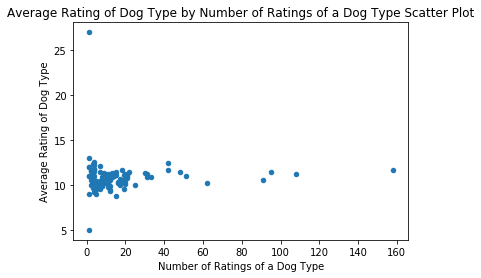

In [709]:
df.plot(x='dog_type_count_values', y='dog_type_mean_values', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');